In [1]:
# define the network
import tensorflow as tf
dims = (28, 28, 1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 888194 (3.39 MB)
Trainable params: 88819

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load and preprocess the data correctly for the encoder
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1) / 255.  # Normalize and add channel dimension
test_images = np.expand_dims(test_images, axis=-1) / 255.

# subset for all of them to 100 samples
train_images = train_images[:100]
test_images = test_images[:100]
Y_train = Y_train[:100]
Y_test = Y_test[:100]

# Verify the shape
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Generate embeddings using the encoder just to verify the shape
train_embeddings = encoder.predict(train_images)
test_embeddings = encoder.predict(test_images)

Train images shape: (100, 28, 28, 1)
Test images shape: (100, 28, 28, 1)
4/4 [==============================] - 0s 2ms/step


In [3]:
#  debug a whole lot of stuff such as shapes to figure out why embedding = embedder.fit_transform(train_images) leads to errors
# Print shapes to debug
print("Shape of train embeddings:", train_embeddings.shape)
print("Shape of test embeddings:", test_embeddings.shape)

Shape of train embeddings: (100, 2)
Shape of test embeddings: (100, 2)


In [6]:
from umap.parametric_umap import ParametricUMAP
import colorama
embedder = ParametricUMAP(encoder=encoder, dims=dims)
print("Before fitting, check dims:", dims)
print("Embedder expected input shape:", embedder.dims)
# Attempt to fit and transform
try:
    embedding = embedder.fit_transform(train_images.reshape((train_images.shape[0], -1)))
    print(f"Embedding shape after fit_transform: {embedding.shape}")
except Exception as e:
    print(f"{colorama.Fore.RED}Error during fit_transform: {e}{colorama.Style.RESET_ALL}")

Before fitting, check dims: (28, 28, 1)
Embedder expected input shape: (28, 28, 1)
Epoch 1/10

316/316 [==============================] - 5s 13ms/step - loss: 0.3381
Epoch 2/10
316/316 [==============================] - 4s 14ms/step - loss: 0.3277
Epoch 3/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3244
Epoch 4/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3253
Epoch 5/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3264
Epoch 6/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3246
Epoch 7/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3239
Epoch 8/10
316/316 [==============================] - 4s 14ms/step - loss: 0.3243
Epoch 9/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3238
Epoch 10/10
316/316 [==============================] - 4s 13ms/step - loss: 0.3244
Embedding shape after fit_transform: (100, 2)


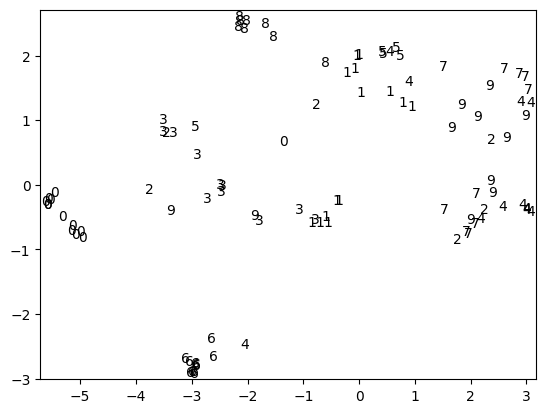

In [10]:
import matplotlib.pyplot as plt

# Calculate the minimum and maximum values of your embeddings
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()

fig, ax = plt.subplots()
# Optionally, add a little margin
margin = 0.1
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)

for i in range(10):
    idx = np.where(Y_train == i)[0]  # Get the indices of samples for digit i
    for j in idx:  # Loop over these indices directly
        ax.text(embedding[j, 0], embedding[j, 1], str(i), ha='center', va='center')

plt.show()
